<a href="https://colab.research.google.com/github/MLuc123/DS3001-SP26/blob/main/Scraping1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="whitegrid")




In [4]:
url = 'https://charlottesville.craigslist.org/search/msa?purveyor=owner'
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'}

response = requests.get(url, headers=header)
bsObj = soup(response.content, 'html.parser')

listings = bsObj.find_all(class_="cl-static-search-result")
print(f"Successfully found {len(listings)} listings!")

Successfully found 131 listings!


In [5]:
instrument_types = ['guitar', 'piano', 'keyboard', 'amp', 'drum', 'bass', 'synth', 'pedal', 'violin', 'ukulele']
instrument_data = []

for post in listings:
    title = post.find('div', class_='title').get_text().lower()
    price_raw = post.find('div', class_='price').get_text()

    link = post.find('a', href=True)['href']

    words = title.split()
    found = [i for i in instrument_types if i in title] # Check title for keywords
    category = found[0] if found else 'other'

    instrument_data.append({
        'title': title,
        'price': price_raw,
        'type': category,
        'url': link
    })

df = pd.DataFrame(instrument_data)
df.head()

,title,price,type,url
0,betsy lynn piano model 1911,$1,piano,https://charlottesville.craigslist.org/msg/d/n...
1,ibanez sa260fm- $ or trades,$1,other,https://charlottesville.craigslist.org/msg/d/c...
2,always looking for broken or unwanted musical ...,$1,other,https://charlottesville.craigslist.org/msg/d/c...
3,"didgeridoos, bamboo, hardwood, w free lesson",$90,other,https://charlottesville.craigslist.org/msg/d/c...
4,1977 maestro ep4 echoplex with remote footswit...,$795,other,https://charlottesville.craigslist.org/msg/d/c...


In [6]:
df['price'] = df['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df_clean = df.dropna(subset=['price']).copy()

df_clean.to_csv('craigslist_instruments_results.csv', index=False)

/tmp/ipython-input-1431261985.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='type', palette='viridis', order=df_clean['type'].value_counts().index)


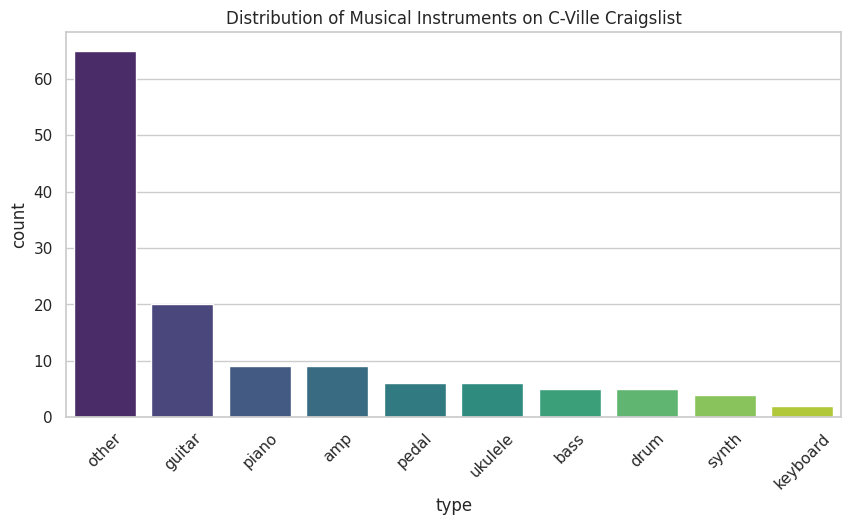

          count         mean          std    min     25%    50%      75%  \
type                                                                       
amp         9.0   438.222222   245.427575   24.0  300.00  425.0   600.00   
bass        5.0   348.000000   237.212984   90.0  200.00  250.0   600.00   
drum        5.0   650.000000   346.410162  200.0  500.00  550.0  1000.00   
guitar     20.0   265.200000   270.599841    0.0   42.75  105.0   500.00   
keyboard    2.0   200.000000   141.421356  100.0  150.00  200.0   250.00   
other      65.0   564.953846   687.886742    1.0  150.00  300.0   700.00   
pedal       6.0   155.000000   107.888832   30.0   81.25  130.0   238.75   
piano       9.0  1933.444444  3237.440815    0.0  195.00  280.0  1200.00   
synth       4.0   640.000000   578.201234  250.0  351.25  405.0   693.75   
ukulele     6.0    15.833333     9.174239    5.0    7.50   17.5    23.75   

             max  
type              
amp        800.0  
bass       600.0  
drum      1

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clean, x='type', palette='viridis', order=df_clean['type'].value_counts().index)
plt.title('Distribution of Musical Instruments on C-Ville Craigslist')
plt.xticks(rotation=45)
plt.show()

print(df_clean.groupby('type')['price'].describe())

/tmp/ipython-input-3596675413.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_clean, x='type', y='price', palette='Set2')


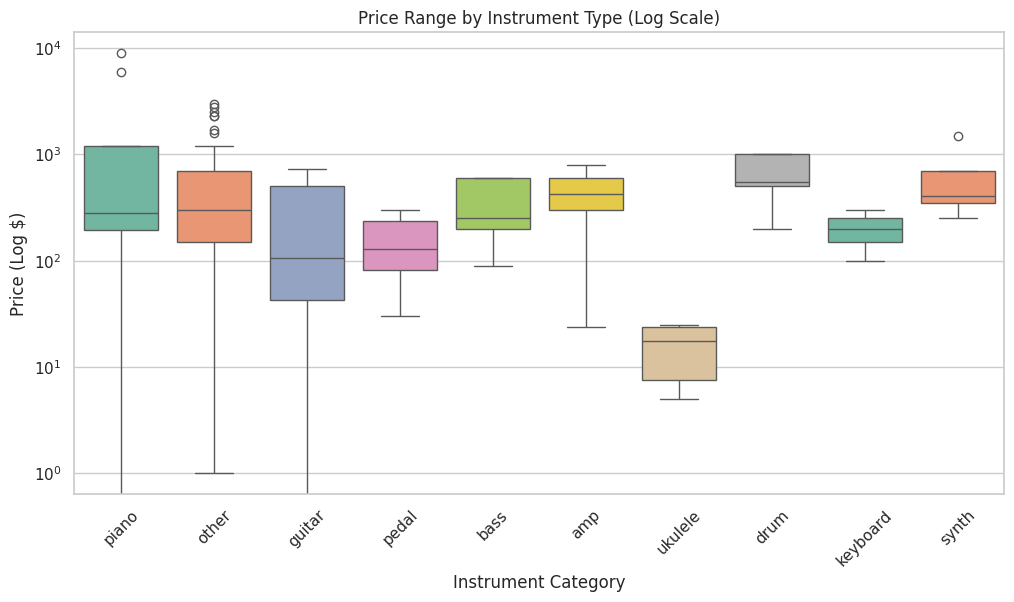

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

ax = sns.boxplot(data=df_clean, x='type', y='price', palette='Set2')

ax.set_yscale("log")

plt.title('Price Range by Instrument Type (Log Scale)')
plt.xlabel('Instrument Category')
plt.ylabel('Price (Log $)')
plt.xticks(rotation=45)

plt.show()

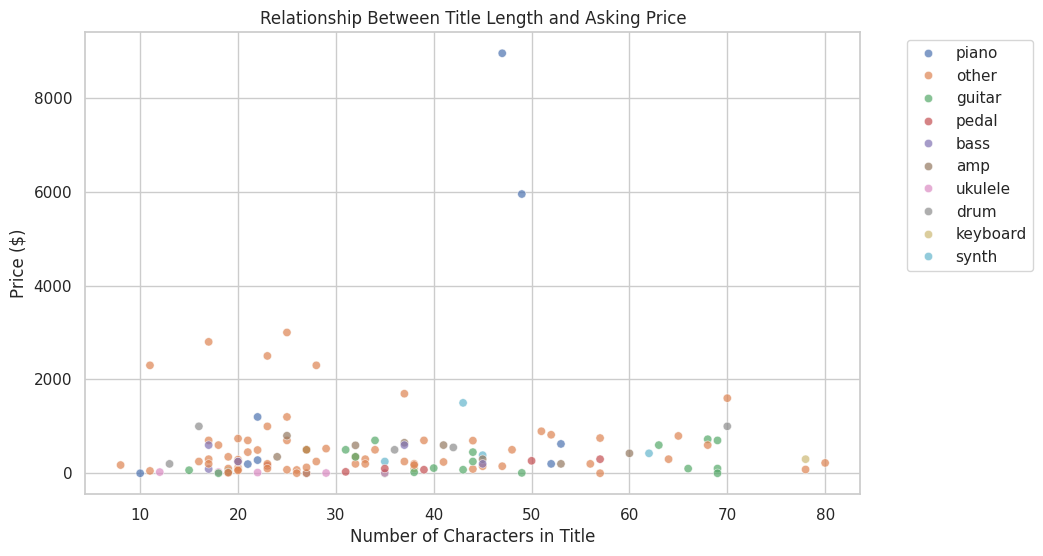

In [9]:
df_clean['title_length'] = df_clean['title'].apply(len)

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_clean, x='title_length', y='price', hue='type', alpha=0.7)

plt.title('Relationship Between Title Length and Asking Price')
plt.xlabel('Number of Characters in Title')
plt.ylabel('Price ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#The Stories
### Pianos
Initially, I suspected that pianos were liabilities; that people couldn't even give away due to their size and moving costs. However, the data tells a different story: while many are listed at very low prices for quick removal, the presence of high-value outliers (reaching nearly $9,000) proves there is a significant market for premium, well-maintained instruments in Charlottesville

###Aspirational Insturments
I also saw that lots of instrurments are selling right at the $0 price point which shows that in Charlottesville, we don't value music very much, specifically items that had high numbers like guitars and ukulales. This would lead me to believe that because these insturments are trendy people would buy them with the intention of learning how to play them, and then give up and choose to sell them or just get rid of them.